In [74]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2 as cv


In [75]:
#Get the dataset
efigi_labels = pd.read_csv('../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_labels.csv')

efigi_features_2key = pd.read_csv('../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_features_2keypoints.csv')

efigi_sift_feature = pd.read_csv('../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_labels.csv')

In [76]:
# Check first dataset
efigi_labels.head()

,Unnamed: 0,PGCname,T,category_label
0,0,PGC0000212,1,2
1,1,PGC0000218,0,2
2,2,PGC0000243,-2,1
3,3,PGC0000255,9,2
4,4,PGC0000281,7,2


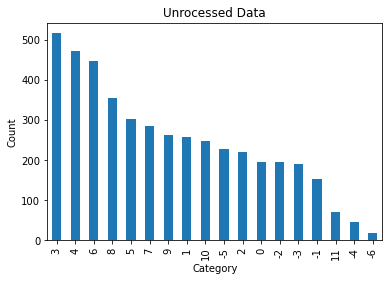

In [77]:

# Unprocessed data
efigi_labels['T'].value_counts().plot(kind='bar')
plt.title('Unrocessed Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


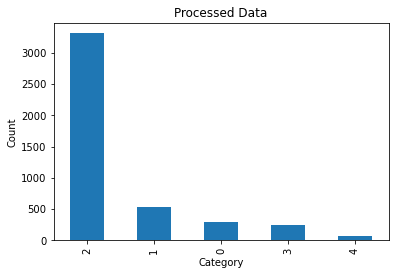

In [78]:
# Processed Data
efigi_labels['category_label'].value_counts().plot(kind='bar')
plt.title('Processed Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [80]:
# Check second dataset
efigi_features_2key

Unnamed: 0    4458
pgc_id        4458
SIFT_0        4458
SIFT_1        4458
SIFT_2        4458
              ... 
SIFT_251      4458
SIFT_252      4458
SIFT_253      4458
SIFT_254      4458
SIFT_255      4458
Length: 258, dtype: int64

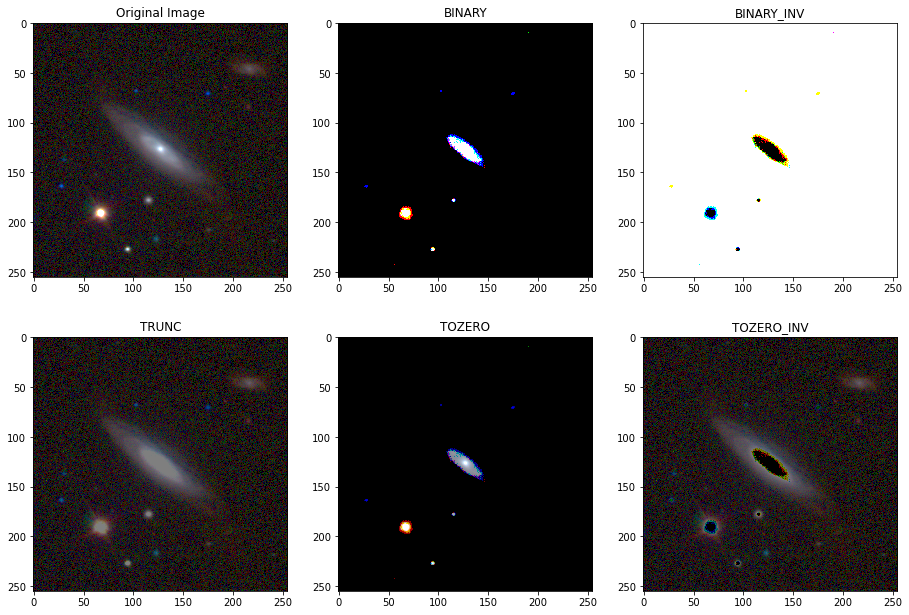

In [68]:
#Try out thresholding
img = cv.imread('../../galaxy_computer_vision_with_EFIGI_data/images/PGC0000212.png',1)


ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,th2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,th3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,th4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,th5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

fig, ax = plt.subplots(2,3)
index = 0
for i in range(2):
    for j in range(3):
        if index < 6:
            ax[i,j].imshow(images[index])
            ax[i,j].set_title(titles[index])
            index = index +1
plt.subplots_adjust(left = 1, bottom=2, right=3, top=4)   
plt.show()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\thresh.cpp:1676: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'
